Name : Ziv Shamli Id: 209188242 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment2

Name : Ravid Masalton Id: 315466771 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment2

# **Too Long Don't Read**

Ask a home buyer to describe their dream home, and they probably won't start with basement ceiling height or proximity to an east-west railroad. But this playground competition dataset proves that much more affects price negotiations than the number of bedrooms or a white picket fence.

In this competition we need to work with a dataset about houses, the dataset contains 81 features (Much more than the last competition) that each of them describes different properties about each house. This time I have to create a ML model that can predict the sale price of a house based on these features, so I'll have to use regression models (Not classification models like in the Titanic competition).we did preprocessing and We noticed that some of the missing values have meaning, we added new features, divided the data using cross-validation, performed features selection and compared different regularizations (lasso, ridge, elastic).
Also, we found the optimal hyperparameters for our model such as learning rate, max iterations

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# sklearn imports
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import style
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from scipy import stats
from matplotlib import gridspec
from tqdm.auto import tqdm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor,Lasso, ElasticNet,Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
# define plt settings
sns.set_theme()


In [ ]:
# define plt settings
sns.set_theme()
plt.rcParams["font.size"] =20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

In [ ]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data=df_train.copy()
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_data=test.copy()
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
print("The dataframe:")
train_data

In [ ]:
from IPython.display import Image
Image(url= "https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2021/03/chaitali-majumder/house-price-497112-KhCJQICS.jpg")

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [ ]:
!pip install sweetviz
import sweetviz as sw

usedcars_report = sw.analyze(train_data)
usedcars_report.show_notebook(layout='vertical')

In [ ]:
print ("The shape of the train data is (row, column):"+ str(train_data.shape))
print (train_data.info())
print ("The shape of the test data is (row, column):"+ str(test_data.shape))
print (test_data.info())

In [ ]:
train_data.describe().T

In [ ]:
from scipy.stats import norm

# Get the fitted parameters used by the function norm
mu, sigma = norm.fit(train_data['SalePrice'])

fig = px.histogram(data_frame=train_data, x='SalePrice')
fig.update_layout(
    title_text=f'SalePrice distribution - mu= {mu:.3f}, sigma= {sigma:.3f}',
    xaxis_title_text='SalePrice',
    yaxis_title_text='Count',
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

# **We will discard the irrelevant columns**


In [ ]:
train_data=train_data.drop(['MiscFeature','Id','PoolQC','Alley','Fence','MasVnrType','FireplaceQu'], axis=1)
test_data=test_data.drop(['MiscFeature','Id','PoolQC','Alley','Fence','MasVnrType','FireplaceQu'], axis=1)
train_data.head()

We see that we have a lot of missing data:

In [ ]:
# count empty values in each column
def count_empty_values_in_each_column(df):
    print('empty values:')
    code = "len(np.where(df[column].isnull())[0])"
    for column in df.columns:
        print(f'`{column}`: {eval(code)}')

count_empty_values_in_each_column(train_data)

In [ ]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True)
    
def fill_na_mean(data, column_name): # Imputes by mean (Only for numeric features)
    data_not_null = data[~data[column_name].isnull()]
    data[column_name].fillna(data_not_null[column_name].mean(), inplace=True)    
    
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x) 

We will mark all the ordinal variables that we have in the data

In [ ]:
ordinal_features = ['OverallQual', 'OverallCond', 'LotShape', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 
                    'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                    'GarageCond']

In [ ]:
def determine_dtypes(df):
    numerical_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    return numerical_cols,categorical_cols

In [ ]:
# determine categorical and numerical features
numerical_cols,categorical_cols =determine_dtypes(train_data)

print('Numerical Cols:', numerical_cols)
print()
print('Categorical Cols:', categorical_cols)
#print('All Cols:', all_cols)
# determine categorical and numerical features
numerical_colsForTest,categorical_colsForTest = determine_dtypes(test_data)

print('Numerical Cols:', numerical_colsForTest)
print()
print('Categorical Cols:', categorical_colsForTest)

# **Feature Engineering**

In [ ]:
def plot_correlation_greater_than(df, greater_than):
    sns.set(font_scale=1.1)
    corr = np.abs(df.corr())[np.abs(df.corr()) >= greater_than]
    mask = np.triu(corr.corr())
    plt.figure(figsize=(27, 18))

    ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1, mask=mask)
    # format x and y labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

    # set the x labels and ticks on top
    # ax.xaxis.tick_top()
    # ax.xaxis.set_label_position('top')
    plt.show()

def plot_correlation_greater_than_by_feature(df, feature, greater_than):
    corr = np.abs(df.corr())[df.corr() > greater_than][feature].dropna().drop(feature).to_frame()
    ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1)
    plt.show()

plot_correlation_greater_than(train_data[numerical_cols], 0.6)
plot_correlation_greater_than_by_feature(train_data[numerical_cols],'SalePrice', 0.6)



In the correlation table we made, you can see all correlations greater than 0.6 with 'SalePrice' are shown to us in a graph.

In [ ]:
features=['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea','OverallQual','GarageCars','SalePrice']
def plot_regplots_high_corr_by_feature(df, feature, high_corr):
    corr = np.abs(df.corr())[np.abs(df.corr()) > high_corr]
    corr_indexes = corr.loc[feature].dropna().drop(feature).index
    nrows = math.ceil(math.sqrt(len(corr_indexes)))
    ncols = math.ceil((len(corr_indexes)/nrows))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))
    axes = axes.flatten()
    for i, j in zip(corr_indexes, axes):
        sns.regplot(x=i, y=feature, data=df, ax=j, order=3, ci=None,  color='r',line_kws={'color':'black'})
        j.set_title(f'{i} by {feature}')
    # remove unused axes
    for i in range(len(corr_indexes), nrows*ncols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()


plot_regplots_high_corr_by_feature(train_data[features],'SalePrice',0.6)

We want to delete all the data that are abnormal from the average, so we will check where they exist and delete them.

In [ ]:
# fig, axs = plt.subplots(8, 5, figsize=(14, 15))
fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(numerical_cols):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=train_data, x=i)
fig.tight_layout(pad=1.0)

plt.show()

In [ ]:

train_data = train_data.drop(train_data[train_data["LotFrontage"] > 185].index)
train_data = train_data.drop(train_data[train_data["LotArea"] > 100000].index)
train_data = train_data.drop(train_data[train_data["BsmtFinSF1"] > 4000].index)
train_data = train_data.drop(train_data[train_data["TotalBsmtSF"] > 5000].index)
train_data = train_data.drop(train_data[train_data["GrLivArea"] > 4000].index)

def remove_outliers(df):
         df.drop(df[(df['OverallQual'] < 5) & (df['SalePrice'] > 200000)].index, inplace=True)
         df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'] > 320000)].index, inplace=True)
         df.drop(df[(df['1stFlrSF'] < 3000) & (df['SalePrice'] > 600000)].index, inplace=True)
         df.drop(df[(df['1stFlrSF'] > 3000) & (df['SalePrice'] < 200000)].index, inplace=True)
         df.drop(df[(df['GarageCars'] < 4) & (df['SalePrice'] > 620000)].index, inplace=True)
         df.reset_index(inplace=True, drop=True)

remove_outliers(train_data)


In [ ]:
all_df = pd.concat([train_data, test_data], keys=['train', 'test']).drop(columns='SalePrice')
display(all_df)
print(all_df.shape)

# **Preprocessing the data**

In [ ]:
def changeToNull(df):
    df.replace('', np.NaN, inplace=True)
    df.fillna(np.NaN, inplace=True)

changeToNull(all_df)

In [ ]:
def countOfNull(df):
    all = df.isnull().sum().sort_values(ascending=False)
    count = all[all != 0]
    percent = (count/len(df)) * 100
    dtypes = df.dtypes[count.index]

    return pd.concat([count, percent, dtypes], axis=1, keys=['count', 'percent', 'dtype'])
    # return pd.concat([count, percent], axis=1, keys=['count', 'percent'])

print("train:")    
countOfNull(train_data)
print("test:")
countOfNull(test_data)

We can see that we still have missing data.

In [ ]:
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtExposure','BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_df[col] = all_df[col].fillna('NA')
for col in ['GarageYrBlt', 'GarageArea','MasVnrArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_df[col] =  all_df[col].fillna(0)
for col in ['MSZoning', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']:
    fill_na_random_pick_column_distribution(all_df, col)     
all_df.drop(labels='Utilities', axis=1, inplace=True)


countOfNull(all_df)


In [ ]:
train_data = all_df.loc['train'].copy().join(train_data['SalePrice'])
test_data = all_df.loc['test'].copy()
train_data

 We managed to complete the missing information.
 
 Now we will try to convert all the information into numerical values.

In [ ]:
ordinal_features = ['OverallQual', 'OverallCond', 'LotShape', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 
                    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                    'GarageCond']


In [ ]:
categorical_cols

In [ ]:
def create_boolean_features(df):
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
def set_as_categorical(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallCond'] = df['OverallCond'].astype(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)

In [ ]:
def ordinal_encode(df, ord_features):
    oe = OrdinalEncoder(dtype=np.int64)
    oe_df = pd.DataFrame(oe.fit_transform(df.loc[:, ord_features]), columns=ord_features)
    return pd.concat([df.drop(columns=ord_features), oe_df], axis=1)

numerical_cols,categorical_cols =determine_dtypes(train_data)
train_data = ordinal_encode(train_data, ordinal_features)
test_data = ordinal_encode(test_data, ordinal_features)

In [ ]:
def feature_engineering(df):
    create_boolean_features(df)
    set_as_categorical(df)
feature_engineering(train_data)
feature_engineering(test_data)

# **Data Slicing**

In [ ]:
t = train_data['SalePrice'].copy()
X = train_data.drop(['SalePrice'], axis=1)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
print('t')
display(t)
print()
print('X')
X.info()

In [ ]:
# encode a given dataframe
def encode(df):
    numerical_cols, categorical_cols = determine_dtypes(df)

    ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

    df_encoded = pd.DataFrame(ct_enc_std.fit_transform(df))
    return df_encoded

We will present some models that we have learned so that we can check which model gives the highest accuracy.

In [ ]:
# all models
hp_models = {
             'SGD Regressor Lasso': SGDRegressor(random_state=42,), 
             'LinearRegression': LinearRegression(), 
             'Ridge': make_pipeline(RobustScaler(), Ridge()), 
             'Lasso': make_pipeline(RobustScaler(), Lasso(random_state=1)), 
             'Elastic Net': make_pipeline(RobustScaler(), ElasticNet(random_state=1, alpha=0.05))}
             

In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
def get_cv_score_and_loss2(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score,mean_val_loss,mean_train_score,mean_train_loss

In [ ]:
numerical_cols,categorical_cols = determine_dtypes(X)
ct = ColumnTransformer([("encoding",OneHotEncoder(sparse=False, handle_unknown='ignore'),categorical_cols),("standard", preprocessing.MinMaxScaler(), numerical_cols)])
model_pipe = make_pipeline(ct, SGDRegressor(random_state=1))
val_score, val_loss, train_score, train_loss =get_cv_score_and_loss2(X, t,model_pipe, transformer=ct,k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

**In our graph we can see that Kfold=5 give us better score and small loss .**

In [ ]:
def get_cv_score_and_loss(X, t, model_name, model, k=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    else:
        raise ValueError('you need to specify k in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc=f'Computing Model {model_name}', total=cv.get_n_splits(X))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.iloc[train_ids]
        t_train = t.iloc[train_ids]
        X_val = X.iloc[val_ids]
        t_val = t.iloc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    fig_score = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Model name: {model_name}, Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig_loss = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Model name: {model_name}, Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    if show_score_loss_graphs:
        fig_loss.show()
        fig_score.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss


In [ ]:
X.info()

In [ ]:
countOfNull(X)

We can see that we have no missing data.

# Regular Train Data (with new features)

In [ ]:
train_data_with_new_feature=X.copy()

In [ ]:
def change_features_based_on_corr(df):
    df['GarageArea_mul_cars'] = df['GarageArea'] *df['GarageCars']
    df=df.drop(['GarageArea','GarageCars'], axis=1)
    df['TotRmsAbvGrd_plos_GrLiveArea'] = df['TotRmsAbvGrd'] * df['GrLivArea']
    df=df.drop(['TotRmsAbvGrd','GrLivArea'], axis=1)
    
change_features_based_on_corr(X)
change_features_based_on_corr(test_data)

In [ ]:
def add_and_update_features(df):
    
    df["Totalarea"] = df["LotArea"] + df["LotFrontage"]
    df["TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]
    df["TotalSF"] = df["TotalBsmtSF"] + df["2ndFlrSF"]



add_and_update_features(X)
add_and_update_features(test_data)


In [ ]:
X.info()

# **Feature Selection**

# **Backward**

In [ ]:
# find best subset of features on this dataset
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold

numerical_cols,categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", preprocessing.MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

selector = RFECV(
    SGDRegressor(random_state=42),
    cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    ).fit(X_encoded, t)

display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                         , y=selector.cv_results_['mean_test_score']))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation R2 score")
fig.show()

X_best=X_encoded.loc[:, selector.support_]
bestFeaturesBackward=X_best.columns
X_best_featuresBackward = X.loc[:, bestFeaturesBackward]

X_best_featuresBackward

You can see that the function checks for us which of the features gives the best prediction and based on that it gives us new data that contains only the best features.

# **Forward**

In [ ]:

numerical_cols,categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", preprocessing.MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

ridge = RidgeCV().fit(X_encoded,t)
sfs_forward = SequentialFeatureSelector(
    ridge,tol=0.001,n_features_to_select='auto',direction="forward"
).fit(X_encoded,t)
selected_feature_indices = np.where(sfs_forward.get_support())[0]

# Get the corresponding column names from X_encoded
selected_feature_names = X_encoded.columns[selected_feature_indices]

print(
    "Features selected by forward sequential selection: ",
    f"{selected_feature_names}"
)
print("number of features: ",len(selected_feature_names))
X_best_featuresForward=X_encoded.loc[:, selected_feature_names]
X_best_featuresForward

# **Hybrid**

In [ ]:


# Assuming X and t are defined elsewhere
numerical_cols, categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)


# Define a range of k values to explore
k_values = [x for x in range(1,81)]

# Initialize lists to store performance metrics for each value of k
accuracy_scores = []

for k in k_values:
    # Select k best features
    k_best_features = SelectKBest(chi2, k=k).fit(X_encoded, t)
    best_features = X_encoded[X.columns[k_best_features.get_support()]]
    X_best_features = X_encoded.loc[:, best_features.columns]
    
    # Train your model (e.g., SVC) using cross-validation
    model = SGDRegressor(random_state=42)
    scores = cross_val_score(model, X_best_features, t, cv=5)  # 5-fold cross-validation
    accuracy = scores.mean()
    accuracy_scores.append(accuracy)

# Print the performance metrics for each value of k
for k, accuracy in zip(k_values, accuracy_scores):
    print(f'k={k}: R^2={accuracy}')

# Select the best k based on the highest accuracy score
best_k = k_values[np.argmax(accuracy_scores)]
print(f'Best k: {best_k}')


In [ ]:
# Load libraries
warnings.filterwarnings("ignore")

# Assuming X and t are defined elsewhere
numerical_cols, categorical_cols = determine_dtypes(X)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

# Select K best features
k_features =best_k
k_best_features = SelectKBest(chi2, k=k_features).fit(X_encoded, t)
best_featuresHybrid = X_encoded[X.columns[k_best_features.get_support()]]
print('Selected top', k_features, 'features: \n', best_featuresHybrid.columns, '\n')
X_best_featuresHybrid = X.loc[:, best_featuresHybrid.columns]
X_best_featuresHybrid
best_featuresHybrid=best_featuresHybrid.columns

In [ ]:
# print lasso, ridge and elasticnet scores as regression 
def compareFeatureSelection(X_best_features,type_selection):
    numerical_cols, categorical_cols = determine_dtypes(X_best_features)

    preprocessor = ColumnTransformer([
                                      ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                      ("standard", preprocessing.MinMaxScaler(), numerical_cols)
    ])


    sgd_reg = SGDRegressor(random_state= 42)
    print(f"mean CV score for regression for{type_selection}:")
    print('',
          cross_val_score(
              make_pipeline(
                  preprocessor, 
                  sgd_reg), 
                  X_best_features, t, cv=10).mean())

compareFeatureSelection(X_best_featuresHybrid,'Hybrid')
compareFeatureSelection(X_best_featuresForward,'Forward')
compareFeatureSelection(X_best_featuresBackward,'Backward')

After comparing the 3 Feature Selection algorithms, we found that Backward gives the best accuracy, so we chose the features that Backward chose.

In [ ]:
X_best_features=X_best_featuresBackward
bestFeatures=X_best_featuresBackward.columns

Now we have the dataframe with the best features.

In [ ]:
X_best_features


In [ ]:
X_best_features.info()

# **Lasso vs Ridge vs Elastic**

In [ ]:
# print lasso, ridge and elasticnet scores as regression 

numerical_cols, categorical_cols = determine_dtypes(X_best_features)

preprocessor = ColumnTransformer([
                                  ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                  ("standard", preprocessing.MinMaxScaler(), numerical_cols)
])


sgd_lasso_reg = SGDRegressor(penalty='l1',
                             alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)
sgd_ridge_reg = SGDRegressor(penalty='l2',
                             alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet',
                               alpha=0.0001, eta0= 0.001, learning_rate='constant', max_iter= 40000, random_state= 42)

print("mean CV score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_lasso_reg), 
              X_best_features, t, cv=10).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_ridge_reg), 
              X_best_features, t, cv=10).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              preprocessor, 
              sgd_elastic_reg), 
              X_best_features, t, cv=10).mean())

In what we see the ridge has the best score

# **Chosing Hyper-Parameters**

In [ ]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV
numerical_cols, categorical_cols = determine_dtypes(X_best_features)
preprocessor = ColumnTransformer([("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                  (" MinMaxScaler", preprocessing.MinMaxScaler(), numerical_cols)])
XNorm=preprocessor.fit_transform(X_best_features)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'),
                    'alpha':[0.0001, 0.001, 0.01, 0.1],
                    'eta0':[0.0001, 0.001, 0.01, 0.1],
                    'max_iter':[40000,20000,10000],
                    'random_state':[42],
                    'learning_rate':['constant']}

gs_model = GridSearchCV(SGDRegressor(),hyper_parameters).fit(XNorm, t)

print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)


With the help of the function we know which hyperparameters give the highest accuracy.
With its help we can know which hyperparameter to put in the selected model.

In [ ]:
pipe = make_pipeline(preprocessor,SGDRegressor(alpha=0.001, eta0= 0.01, learning_rate='constant', max_iter= 40000, penalty= 'l2', random_state= 42))
pipe.fit(X_best_features, t)
test_data = test_data.loc[:, bestFeatures]
preds = pipe.predict(test_data)

In [ ]:
# create the submission file
submission['SalePrice'] = preds
submission.to_csv('submission.csv', index=False)
submission

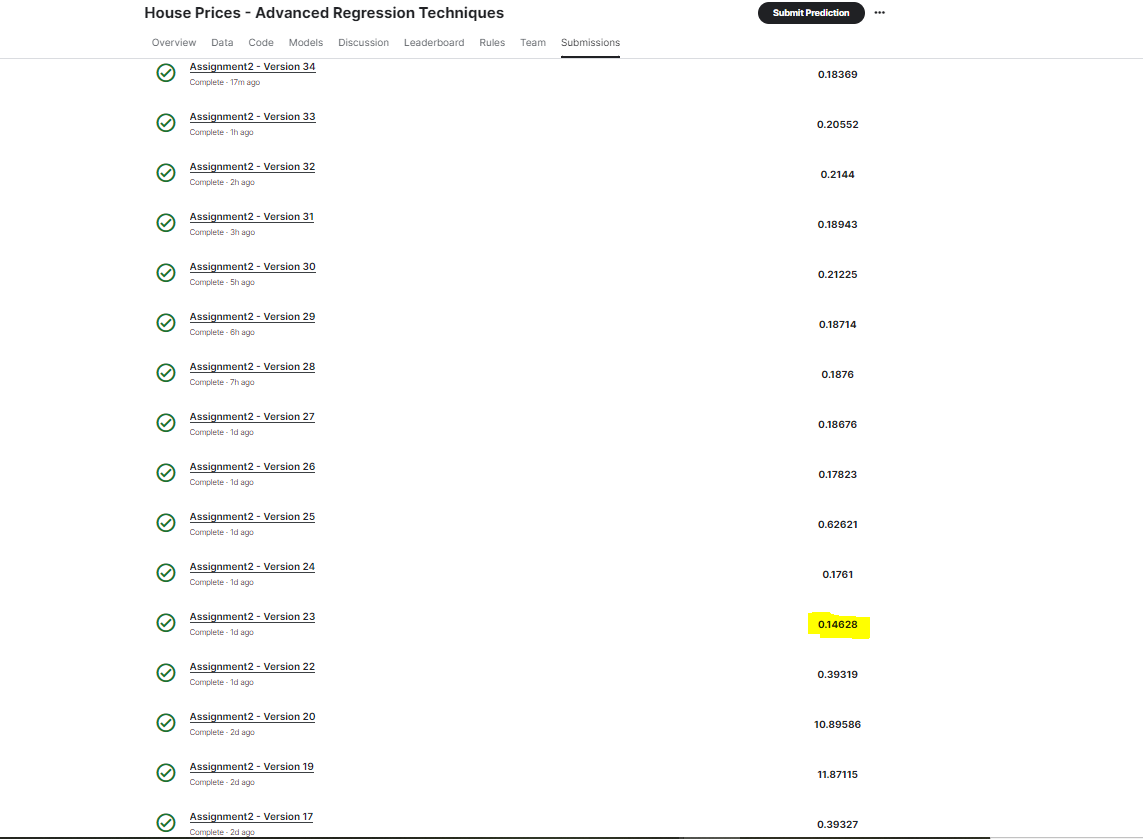

# Summary


***After data analysis that included cleaning columns with a lot of missing data, filling in missing data and classifying the data into numbers or ordinal.
We then built new features to help us increase the accuracy of the model.
We also checked with the help of 3 Feature Selection algorithms: Backward, Forward, Hybrid the optimal features, after comparing them we chose Backward which gave us the highest CV.
Also, we compare between the regularization lasso ,ridge and elastic and we chose ridge because better accuracy.
After that we used grid search to find the optimal Hyper-Parameters with which the SGDRegressor model will bring us a more accurate prediction.
After that the model was tested and the result of the loss was: 0.14628.***

# Assignment4 : House Prices - Advanced Regression Techniques

Name : Ziv Shamli Id: 209188242 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment4

Name : Ravid Masalton Id: 315466771 kaggle notebook:https://www.kaggle.com/code/ravidmasalton/assignment4

# TL;DR

In this task, our objective is to identify the most suitable model for predicting apartment prices. Following the data analysis and preprocessing phase in the previous section, we are now poised to leverage advanced techniques to fine-tune our models. We will experiment with a range of algorithms including Locally Weighted Linear Regression (LWLR), K-Nearest Neighbors (KNN), Decision Trees, and Support Vector Machines (SVM) to ascertain the optimal accuracy.

Moreover, we will employ Principal Component Analysis (PCA) to streamline our feature set and streamline computational complexity. Visual representations, such as graphs, will be instrumental in gauging the accuracy levels across different models. Finally, we'll employ ensemble methods to amalgamate the strengths of various models and determine the most effective combination.


# LWLR

In [ ]:
xnorm=pd.get_dummies(X_best_features, columns=categorical_cols)
xnorm[numerical_cols]=MinMaxScaler().fit_transform(X_best_features[numerical_cols])
xnorm

In [ ]:

!git clone https://github.com/qiaochen/CourseExercises

In [ ]:
numerical_cols, categorical_cols = determine_dtypes(X_best_features)
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
    ("encoding", OrdinalEncoder(), categorical_cols),
    ("standard", MinMaxScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X_best_features, t), columns=all_cols)

In [ ]:
# get cv score for lwlr with k=1
from CourseExercises.lwlr import LWLR
from sklearn.metrics import make_scorer, accuracy_score

arr_X_normalized=np.asarray(X_encoded)
# get best k for lwlr (show the calculation of this sell)
hyper_parameters = {'k': list(range(1, 10))}

gs_lw_model = GridSearchCV(LWLR(k=1), hyper_parameters, 
                           scoring='r2').fit(arr_X_normalized, t)

print('R2 score for regression:')
print('gs_lw_model', gs_lw_model.best_score_)
print('best params', gs_lw_model.best_params_)
print()



**As you can see when we performed lwlr we got R2:0.897**

# KNN

In [ ]:
# run KNN on the dataset and find best K by R2 and accuracy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsRegressor(
    n_neighbors=5, weights='distance'), 
    hyper_parameters).fit(arr_X_normalized, t)

print('R2 score for regression:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)
print()


#  Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Define hyperparameters for tuning
hyper_parameters = {'max_depth': list(range(1, 20)),
                    'min_samples_split': [2, 5, 10, 15, 20],
                    'min_samples_leaf': [1, 2, 4, 8, 12]}

# Initialize and fit the GridSearchCV with DecisionTreeRegressor
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                             hyper_parameters).fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_tree_model:', tree_model.best_score_)
print('Best parameters:',tree_model.best_params_)
print()

In [ ]:
from sklearn import tree
# show the tree in graphics with graphviz
import graphviz 
dot_data = tree.export_graphviz(DecisionTreeRegressor(random_state=42, max_depth=11).fit(arr_X_normalized, t),
               feature_names=X_best_features.columns,
               class_names=t.unique(), 
               filled=True, 
               rounded=True)
graph = graphviz.Source(dot_data) 
graph

In [ ]:
features = X_best_features.columns
dot_data = export_graphviz(DecisionTreeRegressor(random_state=42).fit(arr_X_normalized, t), out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### SVM

In [ ]:
from sklearn.svm import SVR

# Define hyperparameters for tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto']}
# Initialize and fit the GridSearchCV with SVM (SVR)
gs_svm_model = GridSearchCV(SVR(),param_grid).fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_svm_model:', gs_svm_model.best_score_)
print('Best parameters:', gs_svm_model.best_params_)
print()

# The algorithm that gave us the highest R2 is LWLR, so we will use it.

# Feature Compression with PCA 

In [ ]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA
num_of_columns = len(X_best_features.columns)
pca = PCA(n_components=num_of_columns).fit(arr_X_normalized)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(y)+1),y)
plt.axhline(y=0.95, color='r', linestyle='-') # aim to explain higher variance as possible 95%

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np

# Assuming LWLR is correctly defined/imported elsewhere

# Define hyperparameters for tuning
param_grid = {'LWLR__k': list(range(1, 10))}  # Adjust this according to your need, assuming 'k' is a parameter in LWLR

# Define a Pipeline including PCA and LWLR regressor
pipeline = Pipeline([
    ('pca', PCA()),
    ('LWLR', LWLR(k=4))  # Initial 'k' value, will be tuned
])

# Initialize and fit the GridSearchCV with the pipeline
gs_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2')

# Assuming arr_X_normalized and t are defined and hold your feature set and target variable
# Fit the model
gs_model.fit(arr_X_normalized, t)

# Print the results
print('R2 score for regression:')
print('gs_model:', gs_model.best_score_)
print('Best parameters:', gs_model.best_params_)


we can see that lowering the dimension improved the R2

# Ensembles

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np


# Initialize the base regressor
base_regressor = DecisionTreeRegressor()

# Initialize the Bagging ensemble of DecisionTreeRegressor
bagging_regressor = BaggingRegressor(base_estimator=base_regressor, 
                                     n_estimators=100, 
                                     bootstrap=True, 
                                     random_state=42)

# Train the Bagging ensemble on the entire dataset
bagging_regressor.fit(arr_X_normalized, t)

r2_score = bagging_regressor.score(arr_X_normalized, t)
# Print the results
print('R2 score for regression:')
print('gs_model:',r2_score)


In [ ]:
pipe = make_pipeline(preprocessor, BaggingRegressor(base_estimator=base_regressor, 
                                     n_estimators=100, 
                                     bootstrap=True, 
                                     random_state=42))
pipe.fit(X_best_features, t)
test_data = test_data.loc[:, bestFeatures]
preds = pipe.predict(test_data)

In [ ]:
# create the submission file
submission['SalePrice'] = preds
submission.to_csv('submission.csv', index=False)
submission

# reference

The practice notebooks with Shira.